In [1]:
# needed imports
import pandas as pd
import numpy  as np
import sklearn
import sklearn.datasets

from   sklearn.cluster         import AgglomerativeClustering
from   matplotlib              import pyplot as plt
from   scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [3]:
url   = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data  = pd.read_csv(url, sep = ";")

Note: The first line specifies the url of the dataset, the second line loads the dataset into a dataframe data (a dataframe is simply used to hold data).

pd.read_csv() is a function in pandas. The first argument is the path to the data, the second argument is the seperator used in the data set.

In [4]:
X     = data[[u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', \
             u'total sulfur dioxide', u'density', u'pH', u'sulphates', 'alcohol']]
y     = data.quality

In [5]:
n_clusters = 9 

In [6]:
Hclustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'cosine', linkage = 'complete')

In [7]:
Hclustering.fit(X)
ms          = np.column_stack((y,Hclustering.labels_))
df          = pd.DataFrame(ms, columns = ['Actual', 'Clusters'])
pd.crosstab(df['Actual'], df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,All
Actual,,,,,,,,,,
3,1,3,0,4,0,0,0,0,2,10
4,13,15,3,12,2,1,0,1,6,53
5,298,217,4,112,9,5,1,12,23,681
6,163,258,13,109,48,1,0,20,26,638
7,25,68,17,52,13,3,0,6,15,199
8,3,5,0,7,1,1,0,0,1,18
All,503,566,37,296,73,11,1,39,73,1599


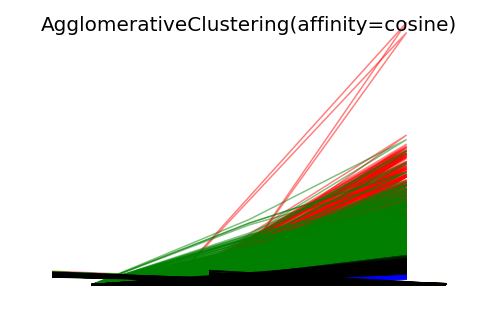

In [8]:
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c in zip(np.arange(n_clusters), 'rgbk'):
    plt.plot(X[Hclustering.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % 'cosine', size=20)

{'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b'],
 'dcoord': [[0.0, 22.930806508713577, 22.930806508713577, 0.0],
  [0.0, 23.029783490179412, 23.029783490179412, 0.0],
  [22.930806508713577,
   29.810886151733477,
   29.810886151733477,
   23.029783490179412],
  [0.0, 45.16350942867178, 45.16350942867178, 29.810886151733477],
  [0.0, 32.622801719240066, 32.622801719240066, 0.0],
  [0.0, 25.217641745071358, 25.217641745071358, 0.0],
  [0.0, 36.22109564796727, 36.22109564796727, 0.0],
  [25.217641745071358,
   46.95259195449628,
   46.95259195449628,
   36.22109564796727],
  [32.622801719240066,
   48.928013687058645,
   48.928013687058645,
   46.95259195449628],
  [45.16350942867178,
   98.92375266705317,
   98.92375266705317,
   48.928013687058645],
  [0.0, 195.0813921239646, 195.0813921239646, 98.92375266705317]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [15.0, 15.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
 

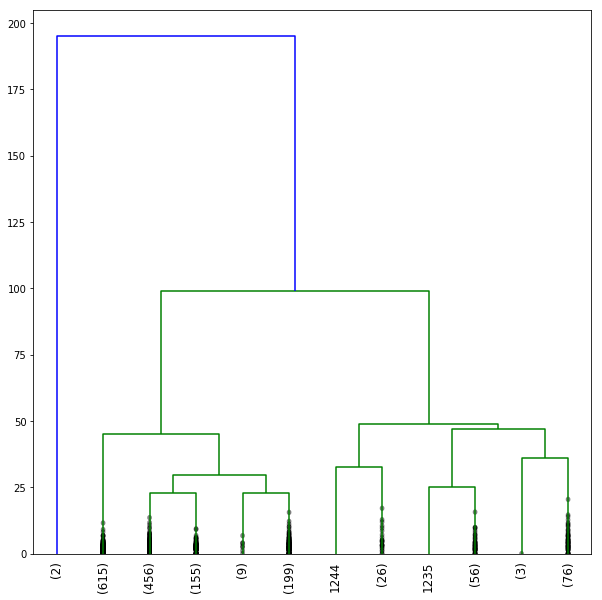

In [9]:
z = linkage(X, 'median')
plt.figure(figsize = (10, 10))
dendrogram(
 z,
 truncate_mode   = 'lastp',
 p               = 12,
 leaf_rotation   = 90.,
 leaf_font_size  = 12.,
 show_contracted = True,
)

In [10]:
for _, metric in enumerate(['euclidean', 'l1', 'l2', 'manhattan', 'cosine']):
    for _, linkage_v in enumerate(['ward', 'complete', 'average']):
        
        try:
            Hclustering = AgglomerativeClustering(n_clusters = n_clusters, affinity = metric, linkage = linkage_v)
            Hclustering.fit(X)
            ms  = np.column_stack((y, Hclustering.labels_))
            df  = pd.DataFrame(ms, columns = ['Actual', 'Clusters'])
            print('\naffinity %s linkage %s' %(metric, linkage_v))
            print(pd.crosstab(df['Actual'], df['Clusters'], margins = True))
            
        except:
            print("\nError %s %s" % (metric, linkage_v))


affinity euclidean linkage ward
Clusters    0    1    2    3   4  5   6    7   8   All
Actual                                                
3           1    2    0    1   0  0   0    6   0    10
4           6   11    4   10   1  0   1   19   1    53
5          87  124   82  126  61  0  45  106  50   681
6          92  175   54  170   6  0  23  108  10   638
7          15   45    8   68   0  2   6   52   3   199
8           1    2    2    4   0  0   1    8   0    18
All       202  359  150  379  68  2  76  299  64  1599

affinity euclidean linkage complete
Clusters   0   1   2   3    4   5    6  7    8   All
Actual                                              
3          0   0   0   0    7   1    2  0    0    10
4          1   0   2   1   31   2   14  0    2    53
5         33  12  50  42  262  29  186  0   67   681
6         11   2   9   4  311  33  224  0   44   638
7          4   0   7   0  124   9   53  2    0   199
8          0   0   1   0   12   1    3  0    1    18
All       4

In [11]:
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters  = n_clusters,
                                    linkage = "average", affinity = metric)
    model.fit(X)


In [13]:
cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

array([1, 2, 0, ..., 1, 0, 1], dtype=int64)

In [21]:
centroids = model.cluster_centers_

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [14]:
print(cluster.labels_)  

[1 2 0 ... 1 0 1]


In [15]:
print(y.head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [16]:
results      = model.fit(X)
results.fit_predict(X)
X["cluster"]  = cluster.labels_
X["target"]   =  y
X["count"]    =  'c'

In [17]:
classification_result = X[["cluster", "target", "count"]].groupby(["cluster", "target"]).agg("count")
print(classification_result)

                count
cluster target       
0       3           1
        4           6
        5          87
        6          92
        7          15
        8           1
1       3           2
        4          11
        5         124
        6         175
        7          45
        8           2
2       4           4
        5          82
        6          54
        7           8
        8           2
3       3           1
        4          10
        5         126
        6         170
        7          68
        8           4
4       4           1
        5          61
        6           6
5       7           2
6       4           1
        5          45
        6          23
        7           6
        8           1
7       3           6
        4          19
        5         106
        6         108
        7          52
        8           8
8       4           1
        5          50
        6          10
        7           3
